<a href="https://colab.research.google.com/github/ymsworks0712/myacademicprojects/blob/main/Ransomware%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
import zipfile
import glob

# (1) DLL_SYS dataset unzip
!unzip "/content/drive/MyDrive/ransomware_data/plaintext/dll_sys_dataset.zip" -d "/content/drive/MyDrive/ransomware_data/plaintext/"

# DLL move
os.makedirs('/content/drive/MyDrive/ransomware_data/plaintext/dll', exist_ok=True)
for f in os.listdir('/content/drive/MyDrive/ransomware_data/plaintext/dll_sys_dataset/dll'):
  shutil.move(f'/content/drive/MyDrive/ransomware_data/plaintext/dll_sys_dataset/dll/{f}',
              '/content/drive/MyDrive/ransomware_data/plaintext/dll')

# SYS move
os.makedirs('/content/drive/MyDrive/ransomware_data/plaintext/sys', exist_ok=True)
for f in os.listdir('/content/drive/MyDrive/ransomware_data/plaintext/dll_sys_dataset/sys'):
  shutil.move(f'/content/drive/MyDrive/ransomware_data/plaintext/dll_sys_dataset/sys/{f}',
              '/content/drive/MyDrive/ransomware_data/plaintext/sys')

# (2) Clone C/C++ source repos
!rm -rf /content/C-Plus-Plus
!rm -rf /content/C
!git clone https://github.com/TheAlgorithms/C-Plus-Plus.git
!git clone https://github.com/TheAlgorithms/C.git

# (3) Copy C files
c_files = glob.glob('/content/C/**/*.c', recursive=True)
c_target = '/content/drive/MyDrive/ransomware_data/plaintext/c'
os.makedirs(c_target, exist_ok=True)
for f in c_files:
  shutil.copy(f, c_target)

# (4) Copy C++ files
cpp_files = glob.glob('/content/C-Plus-Plus/**/*.cpp', recursive=True)
cpp_target = '/content/drive/MyDrive/ransomware_data/plaintext/cpp'
os.makedirs(cpp_target, exist_ok=True)
for f in cpp_files:
  shutil.copy(f, cpp_target)

# (5) Extract GovDocs1
zip_folder = '/content/drive/MyDrive/ransomware_data/govdocs_zips'
extract_to = '/content/drive/MyDrive/ransomware_data/plaintext/govdocs_extracted'
os.makedirs(extract_to, exist_ok=True)
for zip_file in os.listdir(zip_folder):
  if zip_file.endswith(".zip"):
    with zipfile.ZipFile(os.path.join(zip_folder, zip_file), 'r') as zip_ref:
      zip_ref.extractall(extract_to)

print("✅ Setup done!")

Archive:  /content/drive/MyDrive/ransomware_data/plaintext/dll_sys_dataset.zip
   creating: /content/drive/MyDrive/ransomware_data/plaintext/dll_sys_dataset/
   creating: /content/drive/MyDrive/ransomware_data/plaintext/dll_sys_dataset/dll/
  inflating: /content/drive/MyDrive/ransomware_data/plaintext/dll_sys_dataset/dll/AarSvc.dll  
  inflating: /content/drive/MyDrive/ransomware_data/plaintext/dll_sys_dataset/dll/accessibilitycpl.dll  
  inflating: /content/drive/MyDrive/ransomware_data/plaintext/dll_sys_dataset/dll/AcGenral.dll  
  inflating: /content/drive/MyDrive/ransomware_data/plaintext/dll_sys_dataset/dll/AcLayers.dll  
  inflating: /content/drive/MyDrive/ransomware_data/plaintext/dll_sys_dataset/dll/acledit.dll  
  inflating: /content/drive/MyDrive/ransomware_data/plaintext/dll_sys_dataset/dll/aclui.dll  
  inflating: /content/drive/MyDrive/ransomware_data/plaintext/dll_sys_dataset/dll/acppage.dll  
  inflating: /content/drive/MyDrive/ransomware_data/plaintext/dll_sys_dataset/d

In [ ]:
import math
import pandas as pd
from datetime import datetime
import random
import os

# Entropy function
def calculate_entropy(file_path):
  try:
    with open(file_path, 'rb') as f:
      data = f.read()
    if not data:
      return 0.0
    freq_list = [0] * 256
    for b in data:
      freq_list[b] += 1
    entropy = 0.0
    for freq in freq_list:
      if freq > 0:
        p = freq / len(data)
        entropy -= p * math.log2(p)
    return round(entropy, 4)
  except:
    return 0.0

def calculate_compression_ratio(file_path):
  try:
    import zlib
    with open(file_path, 'rb') as f:
      data = f.read()
    if not data:
      return 0.0
    compressed = zlib.compress(data)
    return round(len(compressed) / len(data), 4)
  except:
    return 0.0

# ✅ New: Byte Frequency Distribution (returns variance of distribution)
def calculate_bfd(file_path):
  try:
    with open(file_path, 'rb') as f:
      data = f.read()
    if not data:
      return 0.0
    freq_list = [0] * 256
    for b in data:
      freq_list[b] += 1
    total = len(data)
    bfd = [freq / total for freq in freq_list]  # normalized distribution
    # Option: return variance as a single summarizing value
    mean_val = sum(bfd) / 256
    variance = sum((x - mean_val) ** 2 for x in bfd) / 256
    return round(variance, 6)
  except:
    return 0.0

# ✅ New: Chi-Square Test Score
def calculate_chi_square(file_path):
  try:
    with open(file_path, 'rb') as f:
      data = f.read()
    if not data:
      return 0.0
    freq_list = [0] * 256
    for b in data:
      freq_list[b] += 1
    total = len(data)
    expected = total / 256
    chi_square = 0.0
    for freq in freq_list:
      chi_square += ((freq - expected) ** 2) / expected
    return round(chi_square, 4)
  except:
    return 0.0

def extract_features_from_folder(folder_path, label):
  data = []
  for root, dirs, files in os.walk(folder_path):
    for file in files:
      file_path = os.path.join(root, file)
      try:
        entropy = calculate_entropy(file_path)
        comp_ratio = calculate_compression_ratio(file_path)
        bfd = calculate_bfd(file_path)
        chi_sq = calculate_chi_square(file_path)
        data.append({
          'file_name': file,
          'entropy': entropy,
          'compression_ratio': comp_ratio,
          'byte_freq_dist': bfd,
          'chi_square': chi_sq,
          'label': label
        })
      except:
        continue
  return data

# Run extraction
dll_data = extract_features_from_folder('/content/drive/MyDrive/ransomware_data/plaintext/dll', 1)
sys_data = extract_features_from_folder('/content/drive/MyDrive/ransomware_data/plaintext/sys', 1)
c_data = extract_features_from_folder('/content/drive/MyDrive/ransomware_data/plaintext/c', 1)
cpp_data = extract_features_from_folder('/content/drive/MyDrive/ransomware_data/plaintext/cpp', 1)
govdocs_data = extract_features_from_folder('/content/drive/MyDrive/ransomware_data/plaintext/govdocs_extracted', 1)

all_plaintext = dll_data + sys_data + c_data + cpp_data + govdocs_data
df_plain = pd.DataFrame(all_plaintext)
df_plain.to_csv('/content/drive/MyDrive/ransomware_data/features_plaintext.csv', index=False)
print("✅ Plaintext features extracted!")

✅ Plaintext features extracted!


In [ ]:
!pip install pycryptodome

from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from tqdm import tqdm
import secrets  # for random IV generation
import os
import pandas as pd
import math
import zlib

# === Feature functions ===
def calculate_entropy(file_path):
    try:
        with open(file_path, 'rb') as f:
            data = f.read()
        if not data:
            return 0.0
        freq_list = [0] * 256
        for b in data:
            freq_list[b] += 1
        entropy = 0.0
        for freq in freq_list:
            if freq > 0:
                p = freq / len(data)
                entropy -= p * math.log2(p)
        return round(entropy, 4)
    except:
        return 0.0

def calculate_compression_ratio(file_path):
    try:
        with open(file_path, 'rb') as f:
            data = f.read()
        if not data:
            return 0.0
        compressed = zlib.compress(data)
        return round(len(compressed) / len(data), 4)
    except:
        return 0.0

def calculate_bfd(file_path):
    try:
        with open(file_path, 'rb') as f:
            data = f.read()
        if not data:
            return 0.0
        freq_list = [0] * 256
        for b in data:
            freq_list[b] += 1
        total = len(data)
        bfd = [freq / total for freq in freq_list]
        mean_val = sum(bfd) / 256
        variance = sum((x - mean_val) ** 2 for x in bfd) / 256
        return round(variance, 6)
    except:
        return 0.0

def calculate_chi_square(file_path):
    try:
        with open(file_path, 'rb') as f:
            data = f.read()
        if not data:
            return 0.0
        freq_list = [0] * 256
        for b in data:
            freq_list[b] += 1
        total = len(data)
        expected = total / 256
        chi_square = 0.0
        for freq in freq_list:
            chi_square += ((freq - expected) ** 2) / expected
        return round(chi_square, 4)
    except:
        return 0.0

# === AES-128 Intermittent Encryption ===
def aes_intermittent_encrypt_file(input_path, output_path, key, iv, block_size=4096, encrypt_ratio=0.5):
    """
    Intermittent encryption:
    - Reads file in chunks (block_size).
    - Encrypts only a fraction (encrypt_ratio) of each block.
    - Rest of block is left as plaintext.
    """
    cipher = AES.new(key, AES.MODE_CBC, iv)

    with open(input_path, 'rb') as fin:
        data = fin.read()

    # Pad only the encrypted part, not whole file
    out_data = bytearray()
    i = 0
    while i < len(data):
        chunk = data[i:i+block_size]

        # Split chunk into two parts: encrypt_ratio and skip_ratio
        split_point = int(len(chunk) * encrypt_ratio)
        part_to_encrypt = chunk[:split_point]
        part_to_skip = chunk[split_point:]

        if len(part_to_encrypt) > 0:
            padded = pad(part_to_encrypt, AES.block_size)
            encrypted = cipher.encrypt(padded)
            out_data.extend(encrypted)
        if len(part_to_skip) > 0:
            out_data.extend(part_to_skip)

        i += block_size

    with open(output_path, 'wb') as fout:
        fout.write(out_data)

key = b'ThisIsASecretKey'  # 16 bytes key

# ✅ Include govdocs_extracted along with dll, sys, c, cpp
folders = ['dll', 'sys', 'c', 'cpp', 'govdocs_extracted']
base_in = '/content/drive/MyDrive/ransomware_data/plaintext'
base_out = '/content/drive/MyDrive/ransomware_data/infected'
os.makedirs(base_out, exist_ok=True)

infected_meta = []

for folder in folders:
    in_dir = f"{base_in}/{folder}"
    out_dir = f"{base_out}/{folder}"
    os.makedirs(out_dir, exist_ok=True)

    # 🔄 Walk through subfolders and files
    for root, _, files in os.walk(in_dir):
        for f in tqdm(files, desc=f"Encrypting {folder}", leave=False):
            src = os.path.join(root, f)
            rel_path = os.path.relpath(root, in_dir)  # keep subfolder structure
            save_dir = os.path.join(out_dir, rel_path)
            os.makedirs(save_dir, exist_ok=True)

            ext = f.split('.')[-1].lower()
            new_file_name = f"{f.rsplit('.', 1)[0]}_enc.{ext}"
            dst = os.path.join(save_dir, new_file_name)

            # generate random IV for each encryption
            iv = secrets.token_bytes(16)
            aes_intermittent_encrypt_file(src, dst, key, iv)

            infected_meta.append({
                'file_name': new_file_name,
                'entropy': calculate_entropy(dst),
                'compression_ratio': calculate_compression_ratio(dst),
                'byte_freq_dist': calculate_bfd(dst),
                'chi_square': calculate_chi_square(dst),
                'label': 0
            })

df_infected = pd.DataFrame(infected_meta)
df_infected.to_csv('/content/drive/MyDrive/ransomware_data/features_infected.csv', index=False)
print("✅ Infected features extracted with AES-128 Intermittent Encryption! (Balanced with plaintext)")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 17.0 MB/s eta 0:00:00


✅ Infected features extracted with AES-128 Intermittent Encryption! (Balanced with plaintext)


✅ Dataset loaded and cleaned

🧪 K-Fold Evaluation for Dataset 1 (entropy + compression_ratio):

🔍 Optimizing KNN...
✅ Best Parameters for KNN: {'n_neighbors': 7, 'weights': 'uniform'}

📊 Model: KNN
Accuracy : 0.8485
Precision: 0.8730
Recall   : 0.8157
F1 Score : 0.8433
AUC      : 0.9188

🔍 Optimizing LogisticRegression...
✅ Best Parameters for LogisticRegression: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}

📊 Model: LogisticRegression
Accuracy : 0.7549
Precision: 0.8345
Recall   : 0.6360
F1 Score : 0.7218
AUC      : 0.7431

🔍 Optimizing DecisionTree...
✅ Best Parameters for DecisionTree: {'max_depth': 10, 'min_samples_split': 10}

📊 Model: DecisionTree
Accuracy : 0.8462
Precision: 0.9034
Recall   : 0.7755
F1 Score : 0.8345
AUC      : 0.9242

🔍 Optimizing RandomForest...
✅ Best Parameters for RandomForest: {'max_depth': 10, 'n_estimators': 200}

📊 Model: RandomForest
Accuracy : 0.8577
Precision: 0.9032
Recall   : 0.8015
F1 Score : 0.8492
AUC      : 0.9363

🔍 Optimiz

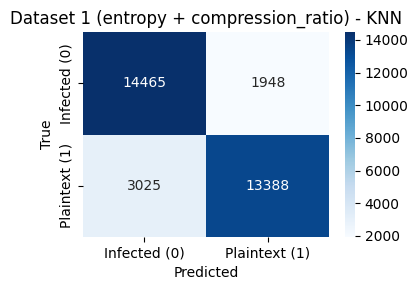


🔍 Optimizing LogisticRegression...
✅ Best Parameters for LogisticRegression: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


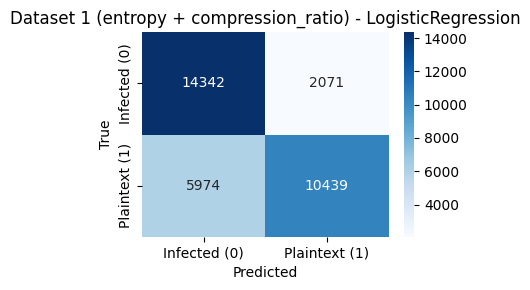


🔍 Optimizing DecisionTree...
✅ Best Parameters for DecisionTree: {'max_depth': 10, 'min_samples_split': 10}


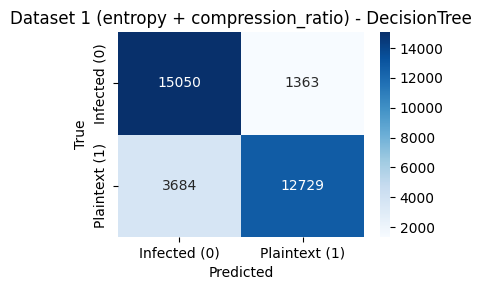


🔍 Optimizing RandomForest...
✅ Best Parameters for RandomForest: {'max_depth': 10, 'n_estimators': 200}


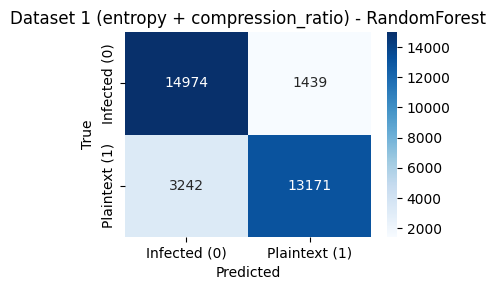


🔍 Optimizing GradientBoosting...
✅ Best Parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


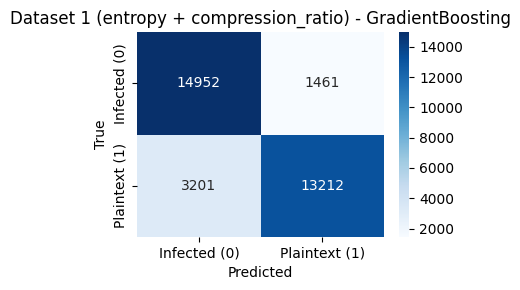


🔍 Optimizing SVM...
✅ Best Parameters for SVM: {'C': 10.0, 'kernel': 'rbf', 'probability': True}


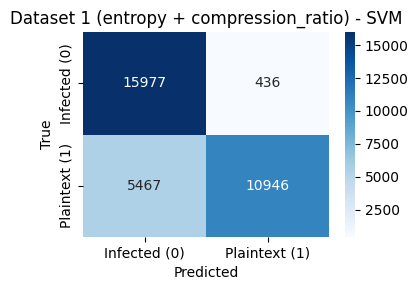


🔍 Optimizing MLP...
✅ Best Parameters for MLP: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'max_iter': 1000, 'solver': 'adam'}


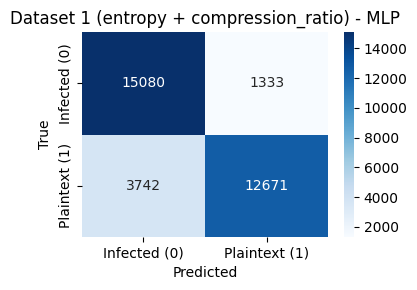


🔍 Confusion Matrices for Dataset 2 (entropy + compression_ratio + BFD)

🔍 Optimizing KNN...
✅ Best Parameters for KNN: {'n_neighbors': 7, 'weights': 'uniform'}


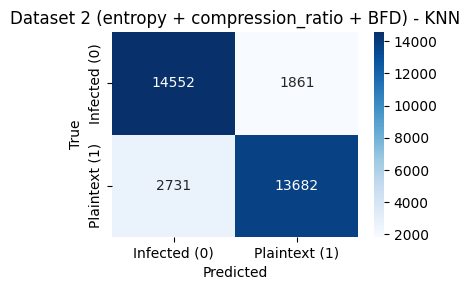


🔍 Optimizing LogisticRegression...
✅ Best Parameters for LogisticRegression: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


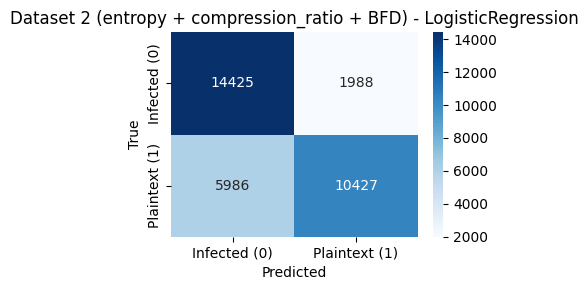


🔍 Optimizing DecisionTree...
✅ Best Parameters for DecisionTree: {'max_depth': 10, 'min_samples_split': 2}


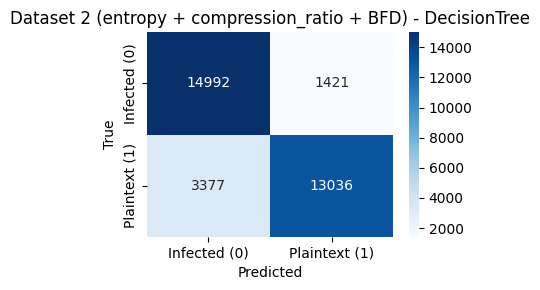


🔍 Optimizing RandomForest...
✅ Best Parameters for RandomForest: {'max_depth': 10, 'n_estimators': 100}


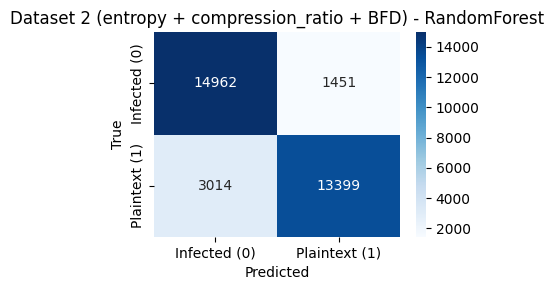


🔍 Optimizing GradientBoosting...
✅ Best Parameters for GradientBoosting: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}


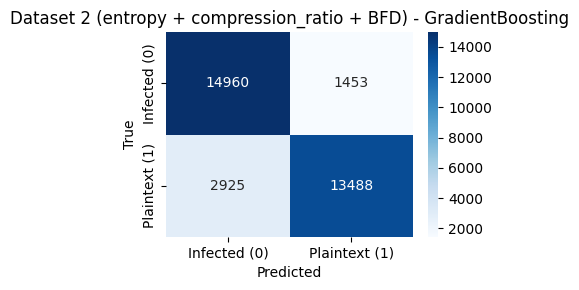


🔍 Optimizing SVM...
✅ Best Parameters for SVM: {'C': 10.0, 'kernel': 'rbf', 'probability': True}


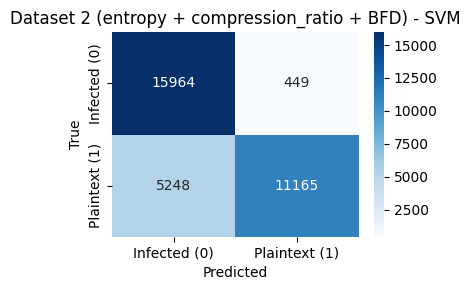


🔍 Optimizing MLP...
✅ Best Parameters for MLP: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'max_iter': 1000, 'solver': 'adam'}


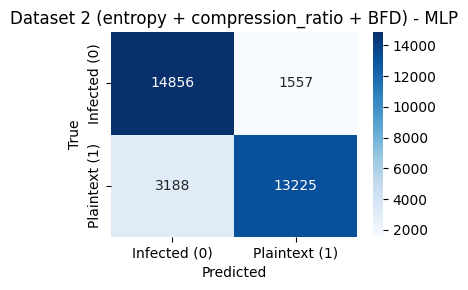


🔍 Confusion Matrices for Dataset 3 (entropy + compression_ratio + BFD + chi_square)

🔍 Optimizing KNN...
✅ Best Parameters for KNN: {'n_neighbors': 7, 'weights': 'uniform'}


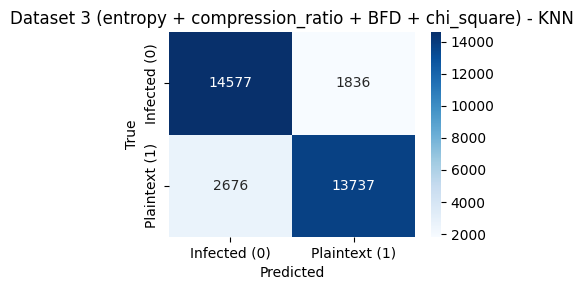


🔍 Optimizing LogisticRegression...
✅ Best Parameters for LogisticRegression: {'C': 10.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


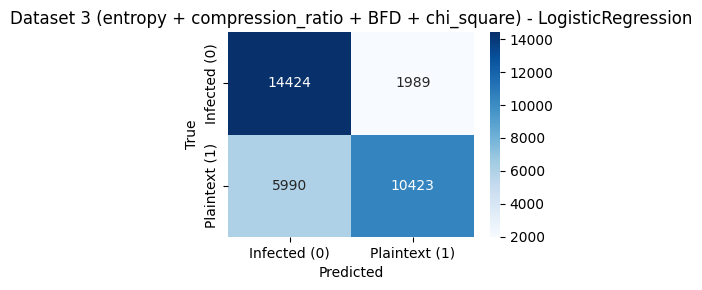


🔍 Optimizing DecisionTree...
✅ Best Parameters for DecisionTree: {'max_depth': 10, 'min_samples_split': 10}


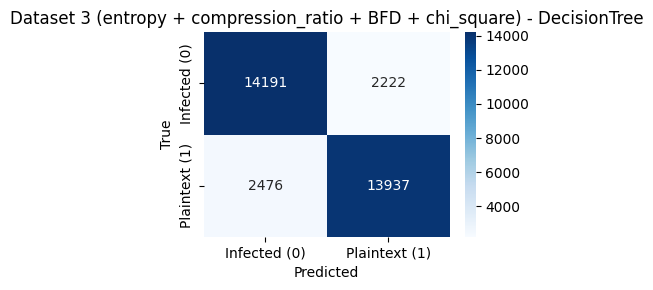


🔍 Optimizing RandomForest...
✅ Best Parameters for RandomForest: {'max_depth': 20, 'n_estimators': 200}


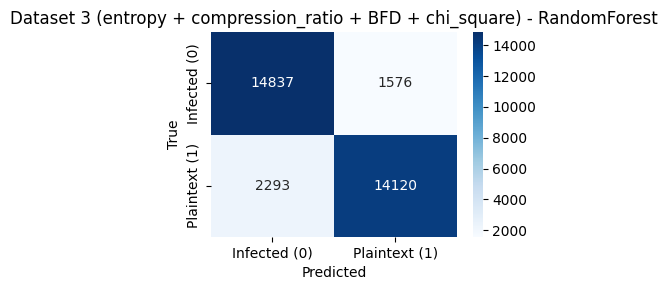


🔍 Optimizing GradientBoosting...
✅ Best Parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


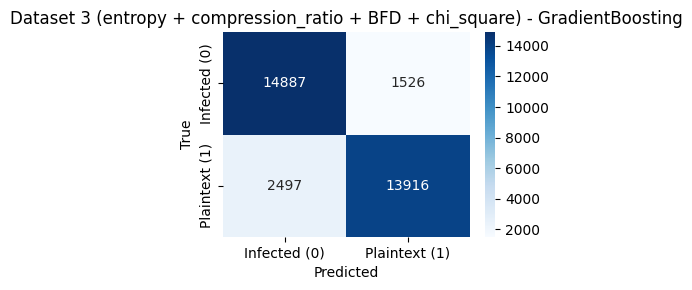


🔍 Optimizing SVM...
✅ Best Parameters for SVM: {'C': 10.0, 'kernel': 'rbf', 'probability': True}


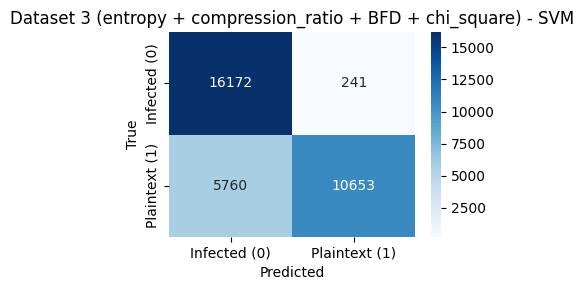


🔍 Optimizing MLP...
✅ Best Parameters for MLP: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'max_iter': 1000, 'solver': 'adam'}


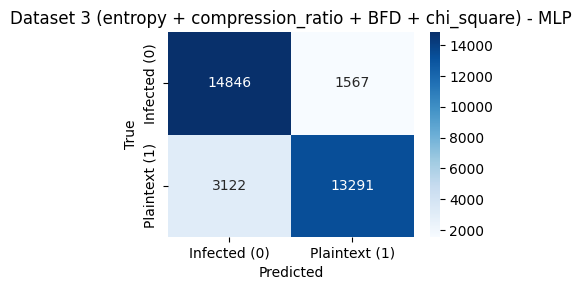

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

base_path = '/content/drive/MyDrive/ransomware_data'
plain_df = pd.read_csv(f'{base_path}/features_plaintext.csv')
infect_df = pd.read_csv(f'{base_path}/features_infected.csv')
df = pd.concat([plain_df, infect_df], ignore_index=True)
df.dropna(inplace=True)
print("✅ Dataset loaded and cleaned")

param_grid = {
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'LogisticRegression': {
        'C': [0.1, 1.0, 10.0],
        'penalty': ['l2'],
        'solver': ['lbfgs'],
        'max_iter': [1000]
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20]
    },
    'GradientBoosting': {
        'learning_rate': [0.05, 0.1],
        'n_estimators': [100, 200],
        'max_depth': [3, 5]
    },
    'SVM': {
        'C': [0.1, 1.0, 10.0],
        'kernel': ['linear', 'rbf'],
        'probability': [True]
    },
    'MLP': {
        'hidden_layer_sizes': [(100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'alpha': [0.0001, 0.001],
        'max_iter': [1000]
    }
}

base_models = {
    'KNN': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'MLP': MLPClassifier()
}

def optimize_model(X, y, model_name):
    print(f"\n🔍 Optimizing {model_name}...")
    grid = GridSearchCV(base_models[model_name], param_grid[model_name], cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X, y)
    print(f"✅ Best Parameters for {model_name}: {grid.best_params_}")
    return grid.best_estimator_

def kfold_train_and_evaluate(X, y, label):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    print(f"\n🧪 K-Fold Evaluation for {label}:")
    for name in base_models.keys():
        model = optimize_model(X_scaled, y, name)
        acc_list, prec_list, rec_list, f1_list, auc_list = [], [], [], [], []
        for train_idx, test_idx in skf.split(X_scaled, y):
            X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
            acc_list.append(accuracy_score(y_test, y_pred))
            prec_list.append(precision_score(y_test, y_pred))
            rec_list.append(recall_score(y_test, y_pred))
            f1_list.append(f1_score(y_test, y_pred))
            if y_prob is not None:
                auc_list.append(roc_auc_score(y_test, y_prob))
        print(f"\n📊 Model: {name}")
        print(f"Accuracy : {sum(acc_list)/10:.4f}")
        print(f"Precision: {sum(prec_list)/10:.4f}")
        print(f"Recall   : {sum(rec_list)/10:.4f}")
        print(f"F1 Score : {sum(f1_list)/10:.4f}")
        print(f"AUC      : {sum(auc_list)/10:.4f}" if auc_list else "AUC: N/A")

def plot_confusion_matrices(X, y, dataset_label):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    print(f"\n🔍 Confusion Matrices for {dataset_label}")
    for name in base_models.keys():
        model = optimize_model(X_scaled, y, name)
        all_true, all_pred = [], []
        for train_idx, test_idx in skf.split(X_scaled, y):
            X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            all_true.extend(y_test)
            all_pred.extend(y_pred)
        cm = confusion_matrix(all_true, all_pred)
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Infected (0)', 'Plaintext (1)'],
                    yticklabels=['Infected (0)', 'Plaintext (1)'])
        plt.title(f'{dataset_label} - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.tight_layout()
        plt.show()

# ✅ Updated datasets according to your new feature sets
y = df['label']
X1 = df[['entropy', 'compression_ratio']]
X2 = df[['entropy', 'compression_ratio', 'byte_freq_dist']]
X3 = df[['entropy', 'compression_ratio', 'byte_freq_dist', 'chi_square']]

kfold_train_and_evaluate(X1, y, "Dataset 1 (entropy + compression_ratio)")
kfold_train_and_evaluate(X2, y, "Dataset 2 (entropy + compression_ratio + BFD)")
kfold_train_and_evaluate(X3, y, "Dataset 3 (entropy + compression_ratio + BFD + chi_square)")

plot_confusion_matrices(X1, y, "Dataset 1 (entropy + compression_ratio)")
plot_confusion_matrices(X2, y, "Dataset 2 (entropy + compression_ratio + BFD)")
plot_confusion_matrices(X3, y, "Dataset 3 (entropy + compression_ratio + BFD + chi_square)")

🔍 Feature Importance from Random Forest:

             Feature  Importance
1  compression_ratio    0.396369
0            entropy    0.353080
3         chi_square    0.142208
2     byte_freq_dist    0.108343


/tmp/ipython-input-1359380187.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="Blues_d")


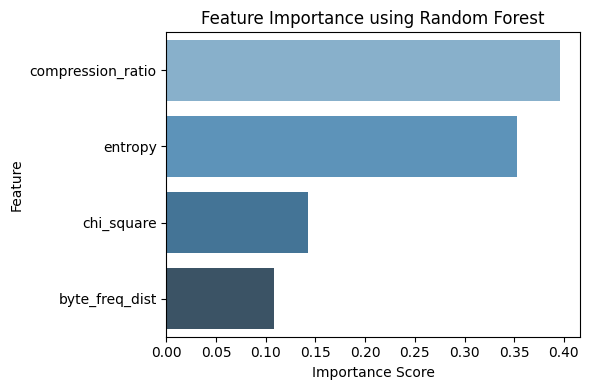

In [ ]:
# 📌 Feature Importance using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Use Dataset 3 (all 4 features) for feature importance
X = df[['entropy', 'compression_ratio', 'byte_freq_dist', 'chi_square']]
y = df['label']

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X, y)

# Get feature importance
importances = rf_model.feature_importances_
features = X.columns

# Show importance values
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("🔍 Feature Importance from Random Forest:\n")
print(feature_importance_df)

# Plot importance
plt.figure(figsize=(6,4))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="Blues_d")
plt.title("Feature Importance using Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()